In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import cov
from patsy import dmatrices
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("/Users/sunitjadeja/Desktop/Sports Analytics/ipl_csv2/all_matches.csv")
print(df)

        match_id   season  start_date                             venue  \
0         335982  2007/08  2008-04-18             M Chinnaswamy Stadium   
1         335982  2007/08  2008-04-18             M Chinnaswamy Stadium   
2         335982  2007/08  2008-04-18             M Chinnaswamy Stadium   
3         335982  2007/08  2008-04-18             M Chinnaswamy Stadium   
4         335982  2007/08  2008-04-18             M Chinnaswamy Stadium   
...          ...      ...         ...                               ...   
200659   1254086     2021  2021-05-02  Narendra Modi Stadium, Ahmedabad   
200660   1254086     2021  2021-05-02  Narendra Modi Stadium, Ahmedabad   
200661   1254086     2021  2021-05-02  Narendra Modi Stadium, Ahmedabad   
200662   1254086     2021  2021-05-02  Narendra Modi Stadium, Ahmedabad   
200663   1254086     2021  2021-05-02  Narendra Modi Stadium, Ahmedabad   

        innings  ball           batting_team                 bowling_team  \
0             1   0.1 

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
print (df.isnull().sum())
# print (df.dtypes)
# print (df.info)
#print (df.columns)
# print (df.head())

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     194583
noballs                   199854
byes                      200135
legbyes                   197460
penalty                   200662
wicket_type               190799
player_dismissed          190799
other_wicket_type         200664
other_player_dismissed    200664
dtype: int64


In [3]:
df1=df[df["season"]=="2020/21"]
print(df1)

        match_id   season  start_date                                venue  \
179058   1216492  2020/21  2020-09-19                 Sheikh Zayed Stadium   
179059   1216492  2020/21  2020-09-19                 Sheikh Zayed Stadium   
179060   1216492  2020/21  2020-09-19                 Sheikh Zayed Stadium   
179061   1216492  2020/21  2020-09-19                 Sheikh Zayed Stadium   
179062   1216492  2020/21  2020-09-19                 Sheikh Zayed Stadium   
...          ...      ...         ...                                  ...   
193612   1237181  2020/21  2020-11-10  Dubai International Cricket Stadium   
193613   1237181  2020/21  2020-11-10  Dubai International Cricket Stadium   
193614   1237181  2020/21  2020-11-10  Dubai International Cricket Stadium   
193615   1237181  2020/21  2020-11-10  Dubai International Cricket Stadium   
193616   1237181  2020/21  2020-11-10  Dubai International Cricket Stadium   

        innings  ball    batting_team         bowling_team     

In [7]:
print (df.isnull().sum())
# print (df.dtypes)
# print (df.info)
#print (df.columns)
# print (df.head())

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     194583
noballs                   199854
byes                      200135
legbyes                   197460
penalty                   200662
wicket_type               190799
player_dismissed          190799
other_wicket_type         200664
other_player_dismissed    200664
dtype: int64


K Rabada         414
Rashid Khan      391
T Natarajan      389
JJ Bumrah        384
A Nortje         376
                ... 
KS Williamson     12
DJ Hooda           6
CH Gayle           5
MR Marsh           4
DA Warner          2
Name: bowler, Length: 98, dtype: int64

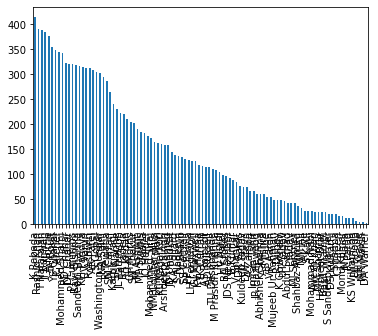

In [8]:
df1['bowler'].value_counts().plot.bar()
df1['bowler'].value_counts()

In [4]:
unique_bowlers=df1['bowler'].unique().tolist()

In [5]:
unique_bowlers

['DL Chahar',
 'SM Curran',
 'L Ngidi',
 'PP Chawla',
 'RA Jadeja',
 'TA Boult',
 'JL Pattinson',
 'JJ Bumrah',
 'KH Pandya',
 'RD Chahar',
 'SS Cottrell',
 'Mohammed Shami',
 'CJ Jordan',
 'K Gowtham',
 'Ravi Bishnoi',
 'A Nortje',
 'MM Sharma',
 'K Rabada',
 'R Ashwin',
 'AR Patel',
 'MP Stoinis',
 'B Kumar',
 'Sandeep Sharma',
 'T Natarajan',
 'MR Marsh',
 'V Shankar',
 'Rashid Khan',
 'Abhishek Sharma',
 'DW Steyn',
 'UT Yadav',
 'NA Saini',
 'Washington Sundar',
 'YS Chahal',
 'S Dube',
 'JD Unadkat',
 'JC Archer',
 'S Gopal',
 'TK Curran',
 'R Tewatia',
 'S Sandeep Warrier',
 'Shivam Mavi',
 'PJ Cummins',
 'SP Narine',
 'AD Russell',
 'Kuldeep Yadav',
 'KA Pollard',
 'JR Hazlewood',
 'Avesh Khan',
 'A Mishra',
 'M Ashwin',
 'JDS Neesham',
 'GJ Maxwell',
 'CV Varun',
 'KL Nagarkoti',
 'KK Ahmed',
 'Mohammad Nabi',
 'AS Rajpoot',
 'R Parag',
 'I Sharma',
 'I Udana',
 'A Zampa',
 'SN Thakur',
 'DJ Bravo',
 'Abdul Samad',
 'HV Patel',
 'Harpreet Brar',
 'S Kaul',
 'KS Williamson',
 '

In [19]:
df2=df1[df1["bowler"].isin(["DL Chahar"])]
print(df2)

        match_id   season  start_date                 venue  innings  ball  \
179058   1216492  2020/21  2020-09-19  Sheikh Zayed Stadium        1   0.1   
179059   1216492  2020/21  2020-09-19  Sheikh Zayed Stadium        1   0.2   
179060   1216492  2020/21  2020-09-19  Sheikh Zayed Stadium        1   0.3   
179061   1216492  2020/21  2020-09-19  Sheikh Zayed Stadium        1   0.4   
179062   1216492  2020/21  2020-09-19  Sheikh Zayed Stadium        1   0.5   
...          ...      ...         ...                   ...      ...   ...   
191799   1216506  2020/21  2020-11-01  Sheikh Zayed Stadium        1  13.2   
191800   1216506  2020/21  2020-11-01  Sheikh Zayed Stadium        1  13.3   
191801   1216506  2020/21  2020-11-01  Sheikh Zayed Stadium        1  13.4   
191802   1216506  2020/21  2020-11-01  Sheikh Zayed Stadium        1  13.5   
191803   1216506  2020/21  2020-11-01  Sheikh Zayed Stadium        1  13.6   

           batting_team         bowling_team        striker    

In [26]:
balls_list=[]
for bowlers in unique_bowlers:
    bowlerdf=df1[df1["bowler"]== 'bowler']
    balls=len(bowlerdf)
    balls_list.append([bowlers,balls])

In [27]:
balls_list

[['DL Chahar', 0],
 ['SM Curran', 0],
 ['L Ngidi', 0],
 ['PP Chawla', 0],
 ['RA Jadeja', 0],
 ['TA Boult', 0],
 ['JL Pattinson', 0],
 ['JJ Bumrah', 0],
 ['KH Pandya', 0],
 ['RD Chahar', 0],
 ['SS Cottrell', 0],
 ['Mohammed Shami', 0],
 ['CJ Jordan', 0],
 ['K Gowtham', 0],
 ['Ravi Bishnoi', 0],
 ['A Nortje', 0],
 ['MM Sharma', 0],
 ['K Rabada', 0],
 ['R Ashwin', 0],
 ['AR Patel', 0],
 ['MP Stoinis', 0],
 ['B Kumar', 0],
 ['Sandeep Sharma', 0],
 ['T Natarajan', 0],
 ['MR Marsh', 0],
 ['V Shankar', 0],
 ['Rashid Khan', 0],
 ['Abhishek Sharma', 0],
 ['DW Steyn', 0],
 ['UT Yadav', 0],
 ['NA Saini', 0],
 ['Washington Sundar', 0],
 ['YS Chahal', 0],
 ['S Dube', 0],
 ['JD Unadkat', 0],
 ['JC Archer', 0],
 ['S Gopal', 0],
 ['TK Curran', 0],
 ['R Tewatia', 0],
 ['S Sandeep Warrier', 0],
 ['Shivam Mavi', 0],
 ['PJ Cummins', 0],
 ['SP Narine', 0],
 ['AD Russell', 0],
 ['Kuldeep Yadav', 0],
 ['KA Pollard', 0],
 ['JR Hazlewood', 0],
 ['Avesh Khan', 0],
 ['A Mishra', 0],
 ['M Ashwin', 0],
 ['JDS Nees